<a href="https://colab.research.google.com/github/orianeido/Titanic-Machine-Learning-from-Disaster/blob/main/Titanic%20Kaggle%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster



---


**Ido Oriane 318420361**

**https://www.kaggle.com/idooriane**

---



## TL;DR

This is a clasification problem when we want to know if passenger has survived the titanic or not.

First of all I did EDA on the data to understand what are the features and filling missing values, next I presented some of the data with Bar Chart, Pairplot and Heatmap.

The next step was performing features engineering: converting categorical to numerical, extract the title from name, using only the letter in cabin and remove unnesscery features.

Then I split the data to 80% train and 20% test and used 3 Classification: Logistic Regression, Sklearn SGDClassifier and MLP.

The results I got was that Sklearn SGDClassifier was the most accurate

**Kaggle score: 77%**

## Imports and Definitions

In [211]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neural_network

# define plt settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

## EDA – Essential Data Analysis

### Data Investigation and Preprocessing

In [247]:
# download test.csv & train.csv file from Github 
!wget https://raw.githubusercontent.com/orianeido/Titanic-Machine-Learning-from-Disaster/main/data/test.csv
!wget https://raw.githubusercontent.com/orianeido/Titanic-Machine-Learning-from-Disaster/main/data/train.csv

--2022-12-06 12:19:07--  https://raw.githubusercontent.com/orianeido/Titanic-Machine-Learning-from-Disaster/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28629 (28K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>]  27.96K  --.-KB/s    in 0s      

2022-12-06 12:19:07 (100 MB/s) - ‘test.csv.1’ saved [28629/28629]

--2022-12-06 12:19:07--  https://raw.githubusercontent.com/orianeido/Titanic-Machine-Learning-from-Disaster/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 20

In [248]:
# load the train & test csv file
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [249]:
train.shape

(891, 12)

There are **891 rows** and **12 columns** in our training dataset.

#### Explanation of the features

Survived: {0 = No, 1 = Yes} `Categorical`

Pclass: Ticket class {1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)}`Categorical`

Name: Passanger name 

Sex: Passanger sex {male, female} `Categorical`

Age: Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5) `Numeric`

SibSp: # of siblings / spouses aboard the Titanic `Numeric`

Parch: # of parents / children aboard the Titanic `Numeric`

Ticket: Ticket number `Categorical`

Fare: Ticket price `Numeric`

Cabin: Cabin number `Categorical`

Embarked: Port of Embarkation {C = Cherbourg, Q = Queenstown, S = Southampton} `Categorical`


---


**Some of our features are:**

*Categorical (sex, smoker and region):*

*Ordinal (children):*

*Numerical (bmi, age and the target charges):*

In [250]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **38%** out of the training set survived the Titanic
* Passenger ages range from **0.4 to 80**




In [251]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*   Only **714** rows out of **891** rows have **Age** value
*   Only **204** rows out of **891** rows have **Cabin** values.
*   Only **889** rows out of **891** rows have **Embarked** values.

### Missing Data

#### Check Missing Data

In [252]:
#check missing data function
def missingDataStatus(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent_1 = data.isnull().sum()/data.isnull().count() * 100
  percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
  return missing_data


In [253]:
#train dataset
missingDataStatus(train)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


*   Embarked feature has only 2 missing values
*   Age has 177 missing values
*   77% of cabin feature is missing

In [254]:
#test dataset
missingDataStatus(test)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


#### Handling Missing Values

In [255]:
# fill empty values in the dataframe
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [256]:
#train
fill_na_median(train, 'Age')
fill_na_random_pick_column_distribution(train, 'Cabin')
fill_na_random_pick_column_distribution(train, 'Embarked')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A36,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E121,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B50,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C68,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,D21,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [257]:
missingDataStatus(train)

,Total,%
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [258]:
#test
fill_na_median(test, 'Age')
fill_na_median(test, 'Fare')
fill_na_random_pick_column_distribution(test, 'Cabin')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C89,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,F G63,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B45,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,E60,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C89,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,D21,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,E52,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,C6,S


In [259]:
missingDataStatus(test)

,Total,%
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0
Cabin,0,0.0


## Data Pesentation

### Bar Chart

In [171]:
#code for bar chart display
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

#### Sex

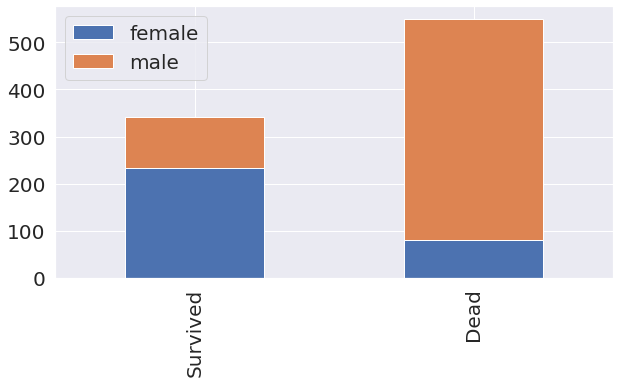

In [172]:
bar_chart('Sex')

* **Women** more likely **survivied** than **Men**


#### Pclass

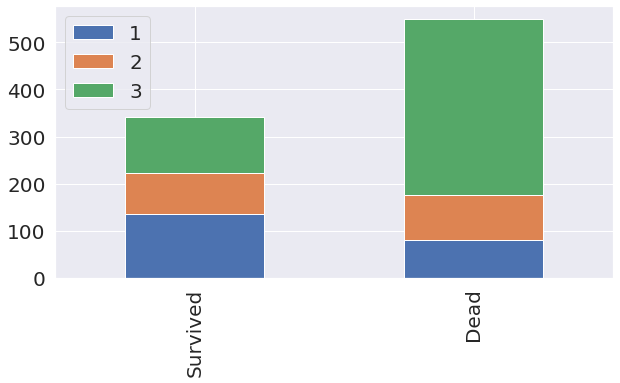

In [173]:
bar_chart('Pclass')

* **1st** class more likely **survivied** than other classes
* **3rd** class more likely **dead** than other classes

#### SibSp

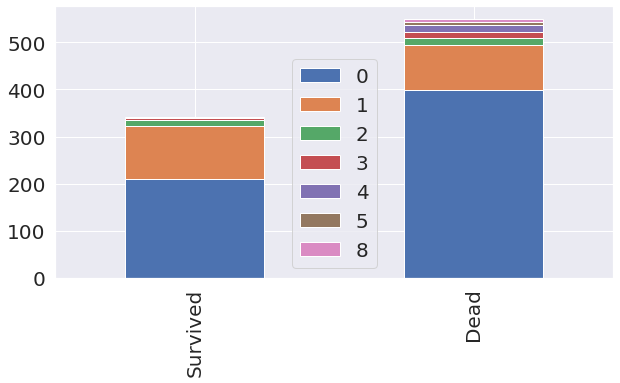

In [174]:
bar_chart('SibSp')

* A person aboarded with **more than 2 siblings or spouse** more likely **survived**
* A person aboarded **without siblings or spouse** more likely **dead**

#### Embarked

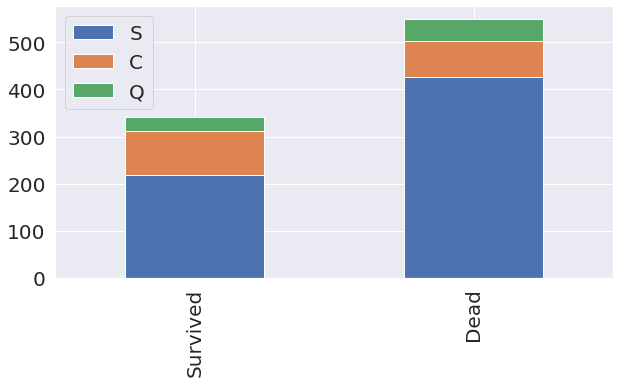

In [175]:
bar_chart('Embarked')

* A person aboarded from **C** slightly more likely **survived**
* A person aboarded from **Q** more likely **dead**
* A person aboarded from **S** more likely **dead**

### Pairplot Visualizing Correlation features vs survived

<Figure size 720x720 with 0 Axes>

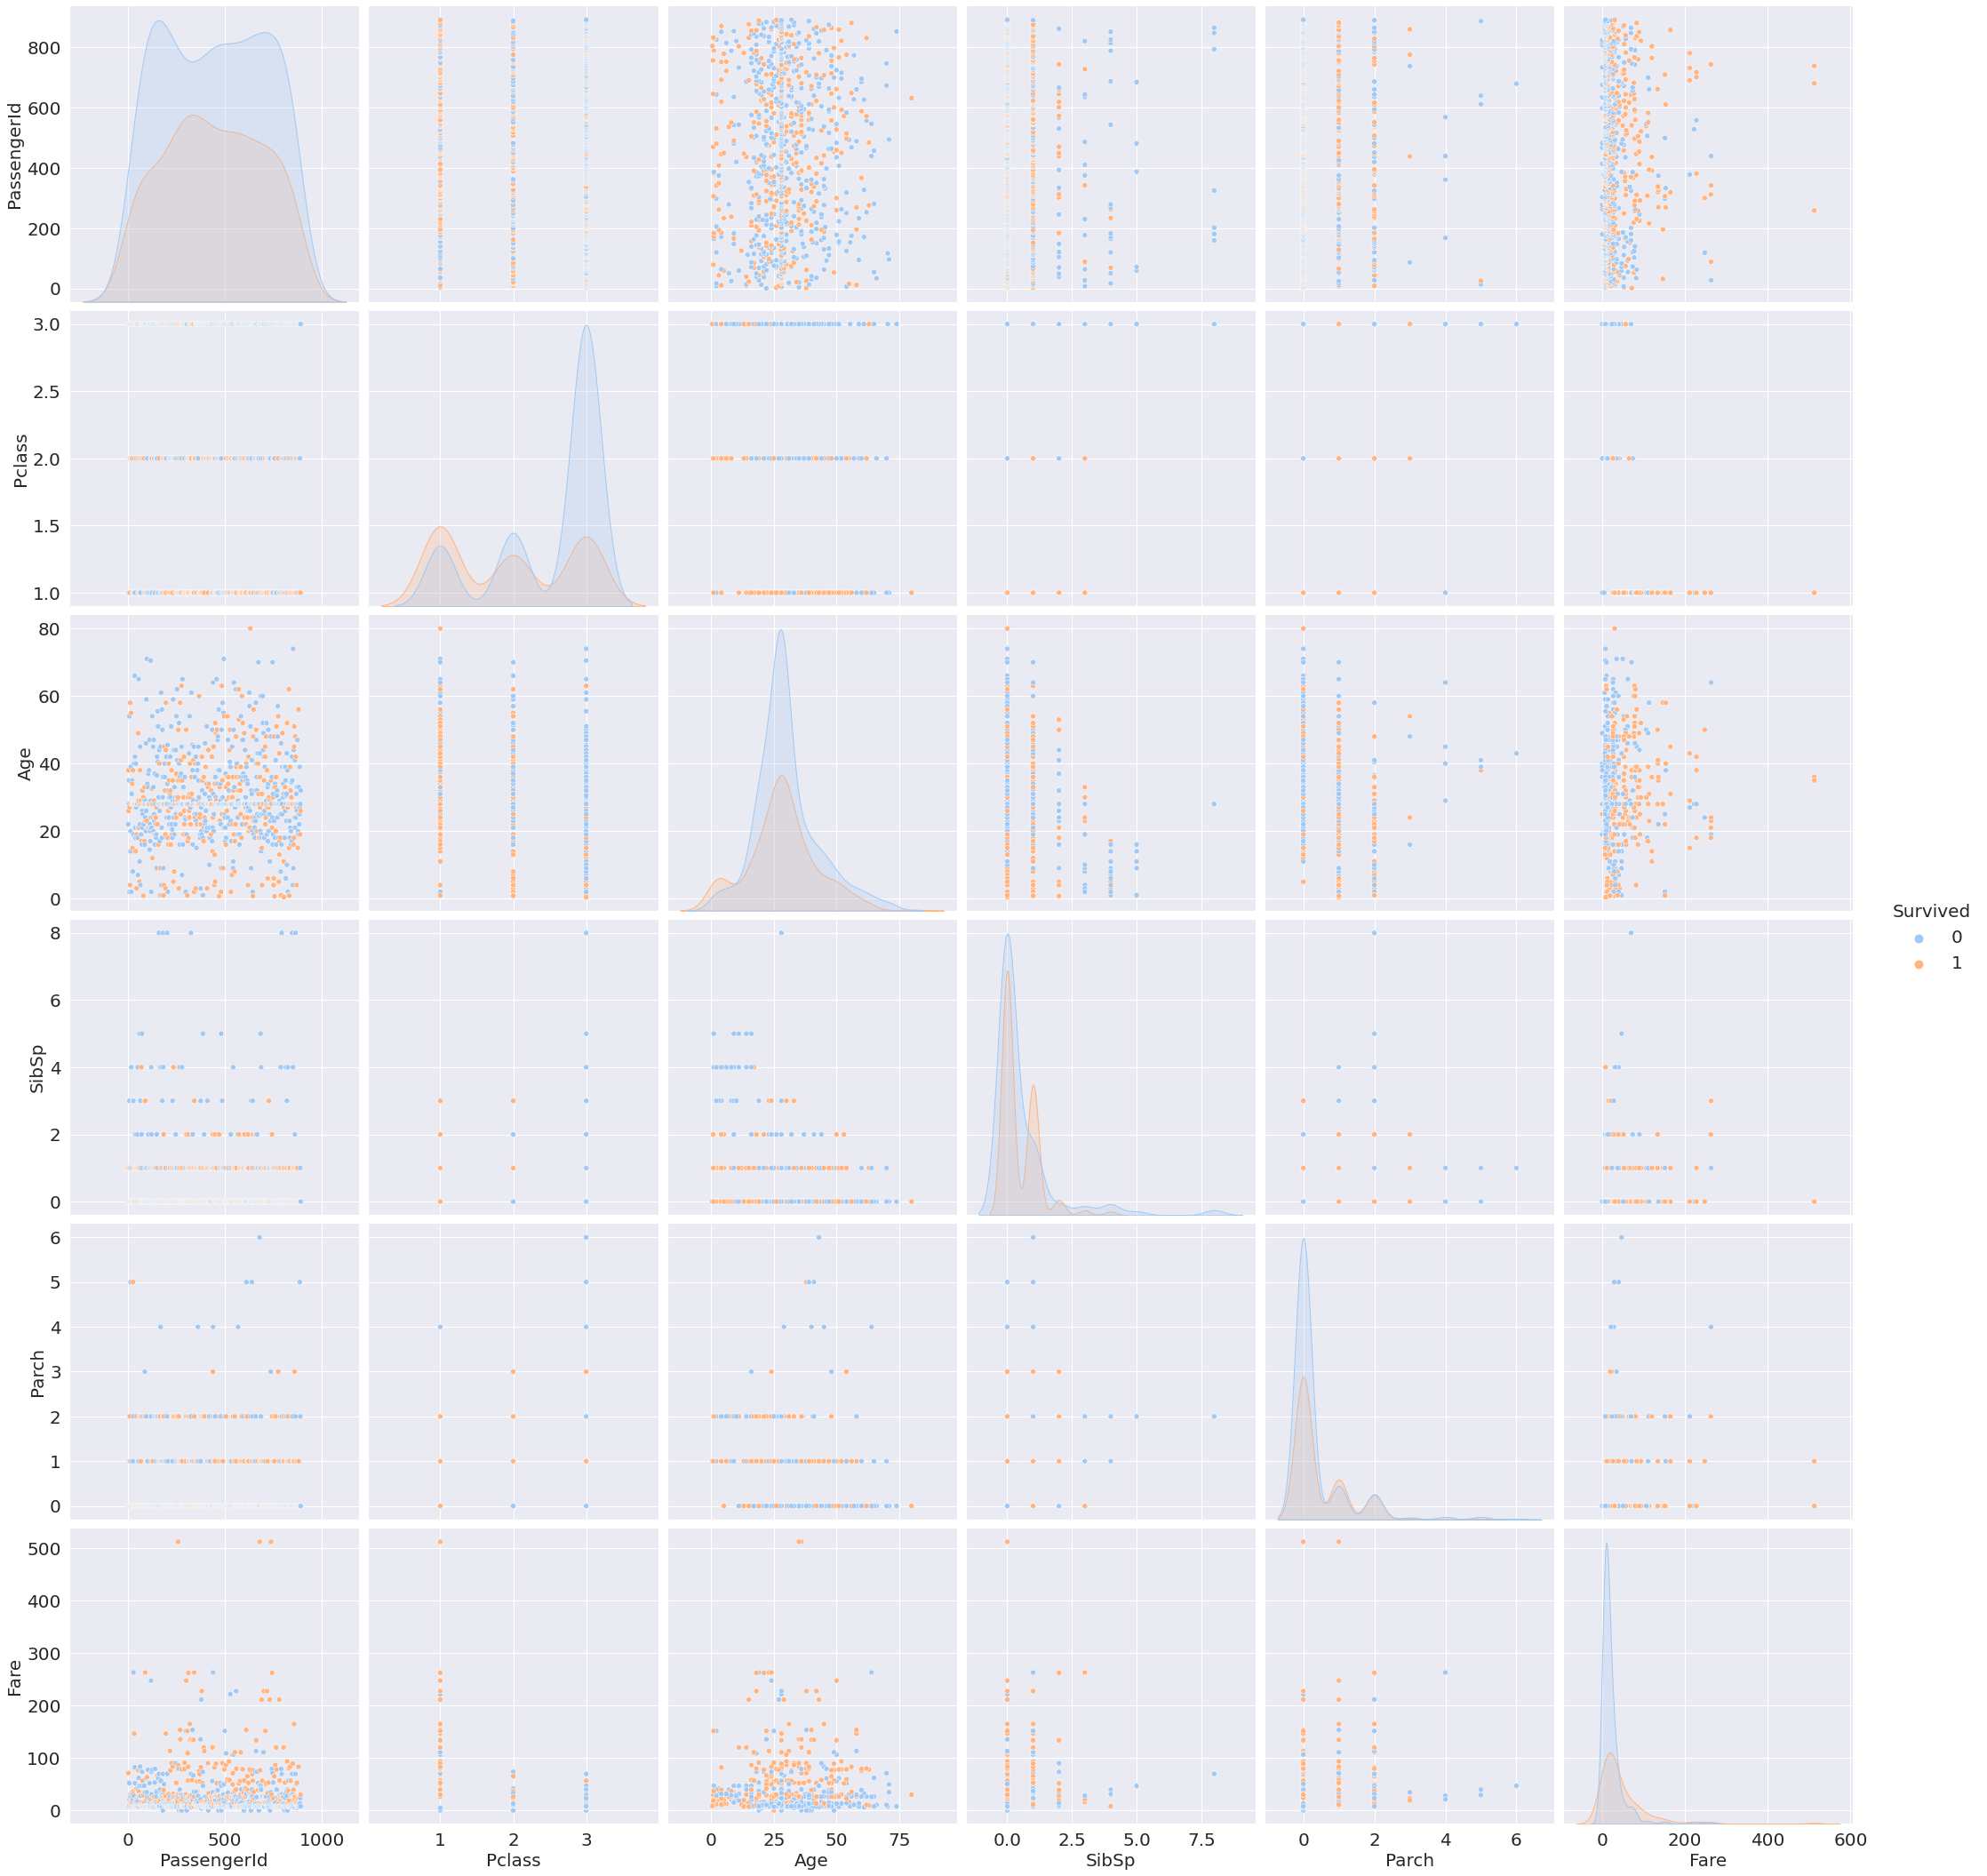

In [176]:
plt.figure(figsize=(10,10))
sns.pairplot(data=train, hue="Survived", palette='pastel', height=5)

### Heatmap

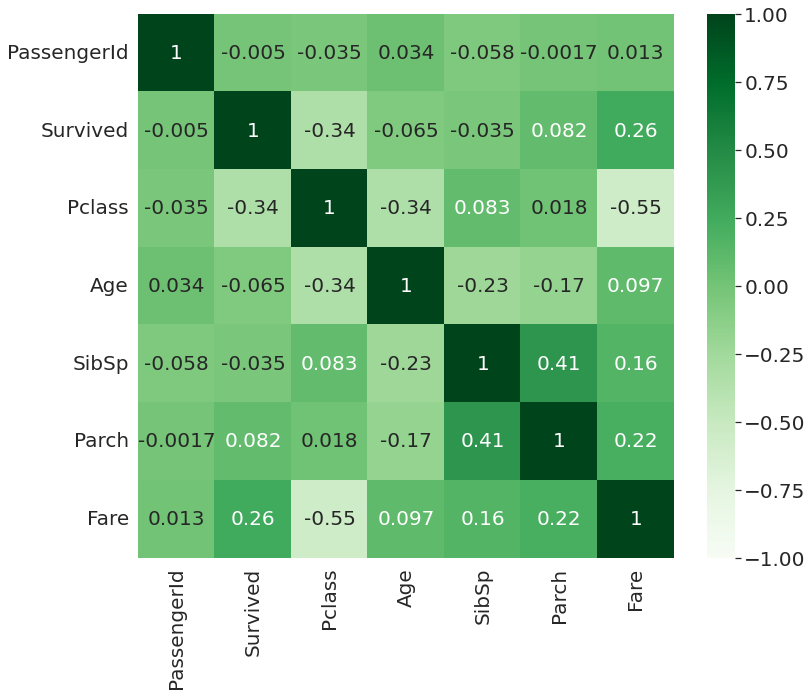

In [177]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True,
            cmap=plt.cm.Greens, vmin=-1, vmax=1)
plt.show()

## Data preprocessing

### Converting categorical features into numerical features

In [260]:
#Convert categorical featuers to numerical
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])
  print(le.classes_)

train

['female' 'male']
['C' 'Q' 'S']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,A36,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,E121,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B50,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,C68,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,D21,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


### Name feature engineering

In [261]:
#Count amount for each titles
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [262]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [263]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

---

Mr - 0

Miss - 1

Mrs - 2

Master - 3

Other - 4



In [264]:
#Mapping the titles to 5 categories
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [265]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,A36,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,E121,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B50,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,C68,2,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,D21,2,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,0


In [266]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,C89,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,F G63,2,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B45,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,E60,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,C89,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,D21,2,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,4
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,E52,2,0
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,C6,2,0


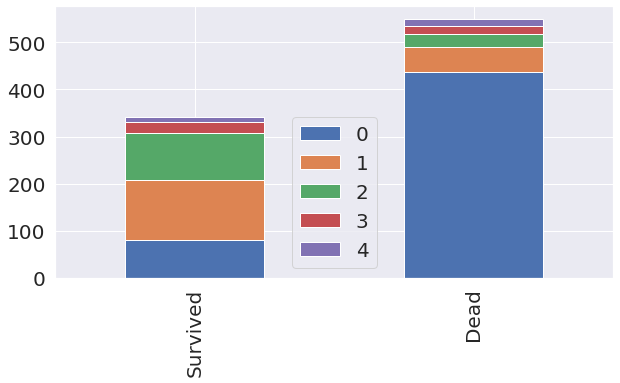

In [267]:
bar_chart('Title')

### Cabin feature engineering

In [269]:
#Count amount for each cabin number
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [270]:
train.Cabin.value_counts()

C    246
B    222
D    143
E    134
F     67
A     60
G     17
T      2
Name: Cabin, dtype: int64

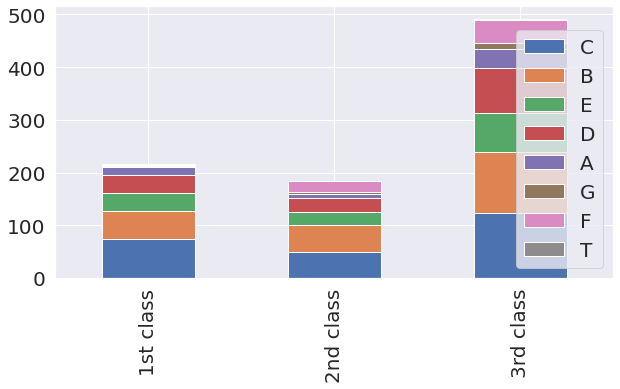

In [271]:
#Bar Chart for new cabin feature
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [272]:
#Mapping the cabin to 8 categories
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

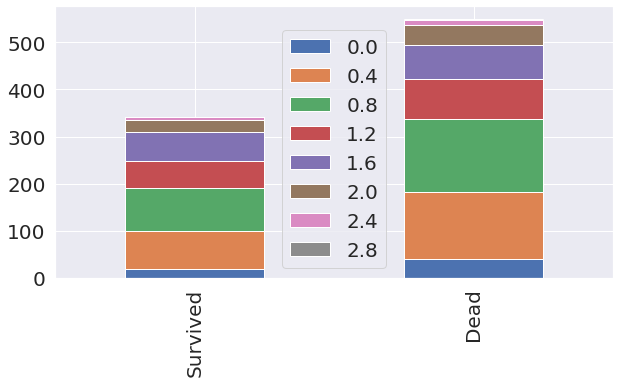

In [274]:
bar_chart('Cabin')

### Clean unnesscery features

In [275]:
#Remove Name and Ticket feature
train.drop(['Name','Ticket'], axis=1, inplace=True)
test.drop(['Name','Ticket'], axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,0.0,2,0
1,2,1,1,0,38.0,1,0,71.2833,0.8,0,2
2,3,1,3,0,26.0,0,0,7.9250,1.6,2,1
3,4,1,1,0,35.0,1,0,53.1000,0.8,2,2
4,5,0,3,1,35.0,0,0,8.0500,0.4,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.8,2,4
887,888,1,1,0,19.0,0,0,30.0000,0.4,2,1
888,889,0,3,0,28.0,1,2,23.4500,1.2,2,1
889,890,1,1,1,26.0,0,0,30.0000,0.8,0,0


## Train Test Split

In [276]:
#split the data to 80% train and 20% test
t = train['Survived']
X = train.drop(['Survived','PassengerId'], axis=1)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(
    X, t, test_size=0.2, random_state=42)

## Classification

### Logistic Regression

In [277]:
LR_cls = linear_model.LogisticRegression()
LR_cls.fit(X_train, t_train)

y_train_prob = LR_cls.predict_proba(X_train)
y_test_prob = LR_cls.predict_proba(X_test)

y_train = LR_cls.predict(X_train)
y_test = LR_cls.predict(X_test)

print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.74916018 0.25083982]
 [0.80412825 0.19587175]
 [0.93485255 0.06514745]
 [0.93278731 0.06721269]
 [0.72321209 0.27678791]]

first 5 predictions of y_train:
[0 0 0 0 0]

first 5 probabilities of y_test_prob:
[[0.67706675 0.32293325]
 [0.76315066 0.23684934]
 [0.87156344 0.12843656]
 [0.1179445  0.8820555 ]
 [0.31379069 0.68620931]]

first 5 predictions of y_test:
[0 0 0 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [278]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train',
      LR_cls.score(X_train, t_train))
print('Accuracy score on test',
      LR_cls.score(X_test, t_test))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test', 
      metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8216292134831461
Accuracy score on test 0.7877094972067039

CE on train 0.42617022716845093
CE on test 0.4280980861493769


### Sklearn SGDClassifier

In [279]:
SGD_cls = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
     linear_model.SGDClassifier(loss='log', alpha=0,
                                learning_rate='constant',
                                eta0=0.01)
     ).fit(X_train, t_train)

y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)

y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)

print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print()
print('first 5 predictions of y_train:')
print(y_train[:5])
print()
print('first 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print()
print('first 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.75036427 0.24963573]
 [0.80913372 0.19086628]
 [0.93955459 0.06044541]
 [0.93466172 0.06533828]
 [0.7528109  0.2471891 ]]

first 5 predictions of y_train:
[0 0 0 0 0]

first 5 probabilities of y_test_prob:
[[0.7121993  0.2878007 ]
 [0.74985885 0.25014115]
 [0.87072866 0.12927134]
 [0.11686511 0.88313489]
 [0.30603869 0.69396131]]

first 5 predictions of y_test:
[0 0 0 1 1]


In [280]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train',
      SGD_cls.score(X_train, t_train))
print('Accuracy score on test',
      SGD_cls.score(X_test, t_test))
print()
print('CE on train',
      metrics.log_loss(t_train, y_train_prob))
print('CE on test', 
      metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8202247191011236
Accuracy score on test 0.7932960893854749

CE on train 0.4267629041672766
CE on test 0.42860756545357137


### MLP

In [281]:
MLP_cls = neural_network.MLPClassifier(
    activation='logistic',
     solver='sgd', alpha=0, max_iter=10000
     ).fit(X_train, t_train)

y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)

print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.800561797752809
Accuracy score on test 0.7486033519553073

CE on train 0.45507094262343223
CE on test 0.4683583208186497


### Summary

In [282]:
#Showing in table th classification score
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Sklearn SGDClassifier', 'MLP Regression'],
    'Score': [LR_cls.score(X_test, t_test), SGD_cls.score(X_test, t_test), MLP_cls.score(X_test, t_test)]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Sklearn SGDClassifier,0.793296
0,Logistic Regression,0.787709
2,MLP Regression,0.748603


We can see in the results that the **Sklearn SGDClassifier** is the most accurate model


## Submission


In [245]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = SGD_cls.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

## References

**SecondPracticeML_2022 -** https://colab.research.google.com/drive/1IkXENldquTljUxGnEmPl8-d80OL-bdiR

**ThirdPracticeML_2022 -** https://colab.research.google.com/drive/1kiMJQvP2ZKmWZzOvAk9spAdPxypNV9AZ

**FourthPracticeML_2022 -** https://colab.research.google.com/drive/1x7fQ_qCjVs6GtBcCwzYPzE3BPQsEGaBu

**Kaggle Notebook "Titanic Survivor Prediction-0.804-(top 8%)" -** https://www.kaggle.com/code/mdmahmudferdous/titanic-survivor-prediction-0-804-top-8